In [2]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

THEGaeideuk


In [3]:
# 1
import pandas as pd
cctv_df = pd.read_csv('data/cctv_seoul.csv')
cctv_df.head()

,구별,CCTV수,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0


In [4]:
# 사용자 함수 정의
def ratio(a, b):    # a 대비 b 비율
    return b / a * 100
    
# 데이터프레임의 2개 열을 선택하여 적용
cctv_df['CCTV비율'] = cctv_df.apply(lambda x: ratio(x['인구수'], x['CCTV수']), axis=1) 
cctv_df['노인비율'] = cctv_df.apply(lambda x: ratio(x['인구수'], x['고령자']), axis=1)  
cctv_df.head()

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


In [5]:
# 2 - (1)
product_click = pd.read_csv("./data/product_click.log", header=None,delimiter=' ' )
product_click

,0,1
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008
...,...,...
741,201708121052,p004
742,201708121052,p004
743,201708121052,p009
744,201708121115,p005


In [7]:
product_click.columns = ['클릭시각', '상품ID']
unique_values = product_click['상품ID'].value_counts()
unique_values

p002    104
p004     93
p001     88
p009     85
p008     81
p007     73
p010     59
p003     58
p006     54
p005     51
Name: 상품ID, dtype: int64

In [8]:
df = pd.DataFrame(unique_values)
df

,상품ID
p002,104
p004,93
p001,88
p009,85
p008,81
p007,73
p010,59
p003,58
p006,54
p005,51


In [9]:
df.columns = ['클릭횟수']

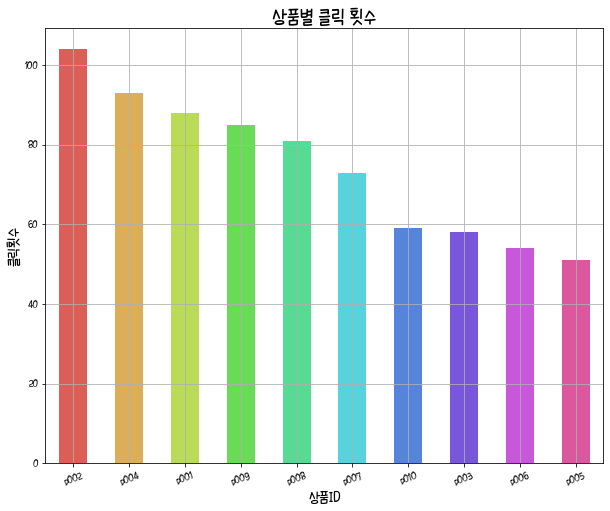

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
mycolors = sns.color_palette('hls',len(df['클릭횟수']))
plt.figure(figsize=(10,8))
df.sort_values(by='클릭횟수', ascending=False, inplace=True)
df['클릭횟수'].plot(kind='bar', grid=True, color=mycolors,rot=20)
plt.xlabel('상품ID', size=15)
plt.ylabel('클릭횟수', size=15)
plt.title('상품별 클릭 횟수', size=20)
plt.savefig("output/hw7.png") 
plt.show()

In [11]:
# 2-(2)
product_click

,클릭시각,상품ID
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008
...,...,...
741,201708121052,p004
742,201708121052,p004
743,201708121052,p009
744,201708121115,p005


In [13]:
product_click = product_click.astype(str)
product_click['time'] = pd.to_datetime(product_click['클릭시각'])
product_click['요일'] = product_click['time'].dt.weekday
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
def weekdays(a):   
    return days[a]
product_click['요일'] = product_click['요일'].apply(weekdays)
product_click

,클릭시각,상품ID,time,요일
0,201612120944,p001,2016-12-12 09:44:00,월요일
1,201612120944,p003,2016-12-12 09:44:00,월요일
2,201612120944,p003,2016-12-12 09:44:00,월요일
3,201612120945,p008,2016-12-12 09:45:00,월요일
4,201612121052,p008,2016-12-12 10:52:00,월요일
...,...,...,...,...
741,201708121052,p004,2017-08-12 10:52:00,토요일
742,201708121052,p004,2017-08-12 10:52:00,토요일
743,201708121052,p009,2017-08-12 10:52:00,토요일
744,201708121115,p005,2017-08-12 11:15:00,토요일


In [14]:
unique_weekday = product_click['요일'].value_counts()
unique_weekday

목요일    187
화요일    173
월요일    142
금요일    125
수요일    103
토요일     16
Name: 요일, dtype: int64

In [15]:
print('클릭 수가 제일 많은 요일은 ', unique_weekday.index[0],'입니다.', sep='')

클릭 수가 제일 많은 요일은 목요일입니다.


In [16]:
# 2-(3)
product_click['시간대'] = product_click['time'].dt.hour
product_click

,클릭시각,상품ID,time,요일,시간대
0,201612120944,p001,2016-12-12 09:44:00,월요일,9
1,201612120944,p003,2016-12-12 09:44:00,월요일,9
2,201612120944,p003,2016-12-12 09:44:00,월요일,9
3,201612120945,p008,2016-12-12 09:45:00,월요일,9
4,201612121052,p008,2016-12-12 10:52:00,월요일,10
...,...,...,...,...,...
741,201708121052,p004,2017-08-12 10:52:00,토요일,10
742,201708121052,p004,2017-08-12 10:52:00,토요일,10
743,201708121052,p009,2017-08-12 10:52:00,토요일,10
744,201708121115,p005,2017-08-12 11:15:00,토요일,11


In [17]:
unique_hour = product_click['시간대'].value_counts()
unique_hour

9     111
14    102
11    101
13     80
10     77
15     67
16     51
17     27
12     19
8      18
4      17
1      17
0      13
2      12
18     12
5      11
3      11
Name: 시간대, dtype: int64

In [18]:
print(unique_hour.index[0],'시와 ',unique_hour.index[0] +1,'시 사이에 제일 많이 클릭했습니다.', sep='')

9시와 10시 사이에 제일 많이 클릭했습니다.


In [19]:
# 3-(1)
emp_df = pd.read_csv('data/emp.csv')
emp_df.head()

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30


In [20]:
emp_df[['sal','deptno']].groupby('deptno').sum()


,sal
deptno,
10,8750
20,10875
30,9400


In [21]:
# 3-(2)
emp_df[['job','sal']].groupby('job').sum()

,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [22]:
# 3-(3)
emp_df['hiredate'] = pd.to_datetime(emp_df['hiredate'])
emp_df[['job','sal','deptno','hiredate']].groupby(['deptno','job']).agg({'sal':'max', 'hiredate':'min'})  

sal   hiredate
deptno job                       
10     CLERK      1300 1982-01-25
       MANAGER    2450 1981-09-06
       PRESIDENT  5000 1981-11-17
20     ANALYST    3000 1981-12-13
       CLERK      1100 1980-12-17
       MANAGER    2975 1981-03-02
30     CLERK       950 1981-12-03
       MANAGER    2850 1981-05-01
       SALESMAN   1600 1981-02-03

In [23]:
# 3-(4)
emp_df[['job','sal','deptno']].groupby(['job','deptno']).agg({'sal':'max'})  

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600

In [24]:
# 3-(5)
pv1 = pd.pivot_table(emp_df,              # 피벗할 데이터프레임
                     index='deptno',    # 행 위치에 들어갈 열
                     columns='job',    # 열 위치에 들어갈 열
                     values='sal',     # 데이터로 사용할 열
                     aggfunc='sum')   # 데이터 집계 함수
pv1

job,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
deptno,,,,,
10,NaN,1300.0,2450.0,5000.0,NaN
20,6000.0,1900.0,2975.0,NaN,NaN
30,NaN,950.0,2850.0,NaN,5600.0


In [25]:
# 3-(6)
pv1.fillna(0, inplace=True)
pv1

job,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
deptno,,,,,
10,0.0,1300.0,2450.0,5000.0,0.0
20,6000.0,1900.0,2975.0,0.0,0.0
30,0.0,950.0,2850.0,0.0,5600.0


<AxesSubplot:xlabel='job', ylabel='deptno'>

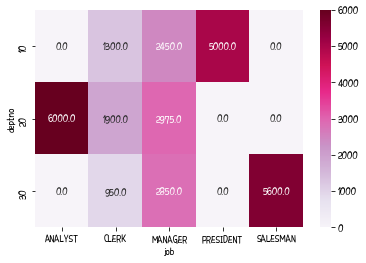

In [27]:
# 3-(7)
sns.heatmap(pv1, annot=True, fmt='.1f', cmap="PuRd")

In [28]:
# 3-(8)
emp_df['hiredatenew'] = pd.to_datetime(emp_df['hiredate'])
emp_df['year'] = emp_df['hiredatenew'].dt.year
emp_df['month'] = emp_df['hiredatenew'].dt.month
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   empno        14 non-null     int64         
 1   ename        14 non-null     object        
 2   job          14 non-null     object        
 3   mgr          13 non-null     float64       
 4   hiredate     14 non-null     datetime64[ns]
 5   sal          14 non-null     int64         
 6   comm         3 non-null      float64       
 7   deptno       14 non-null     int64         
 8   hiredatenew  14 non-null     datetime64[ns]
 9   year         14 non-null     int64         
 10  month        14 non-null     int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(2)
memory usage: 1.3+ KB


In [29]:
emp_df.head()

,empno,ename,job,mgr,hiredate,sal,comm,deptno,hiredatenew,year,month
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20,1980-12-17,1980,12
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30,1981-02-20,1981,2
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30,1981-02-03,1981,2
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20,1981-03-02,1981,3
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30,1981-10-22,1981,10


In [30]:
# 3-(9)
pv2 = pd.pivot_table(emp_df,              # 피벗할 데이터프레임
                     index=['year', 'month'],    # 행 위치에 들어갈 열
                     columns='deptno',    # 열 위치에 들어갈 열
                     values='sal',     # 데이터로 사용할 열
                     aggfunc='max')   # 데이터 집계 함수
pv2.fillna(0, inplace=True)
pv2

deptno          10      20      30
year month                        
1980 12        0.0   800.0     0.0
1981 2         0.0     0.0  1600.0
     3         0.0  2975.0     0.0
     5         0.0     0.0  2850.0
     9      2450.0     0.0     0.0
     10        0.0     0.0  1250.0
     11     5000.0     0.0     0.0
     12        0.0  3000.0   950.0
1982 1      1300.0     0.0     0.0
     12        0.0  3000.0     0.0
1983 1         0.0  1100.0     0.0
1984 10        0.0     0.0  1500.0

In [31]:
# 3-(10)
print(pv2.xs((1981, 12)))

deptno
10       0.0
20    3000.0
30     950.0
Name: (1981, 12), dtype: float64


In [32]:
print(pv2.xs((1982)))

deptno      10      20   30
month                      
1       1300.0     0.0  0.0
12         0.0  3000.0  0.0


In [34]:
print(pv2.xs((12),level='month'))

deptno   10      20     30
year                      
1980    0.0   800.0    0.0
1981    0.0  3000.0  950.0
1982    0.0  3000.0    0.0


<AxesSubplot:xlabel='deptno', ylabel='year-month'>

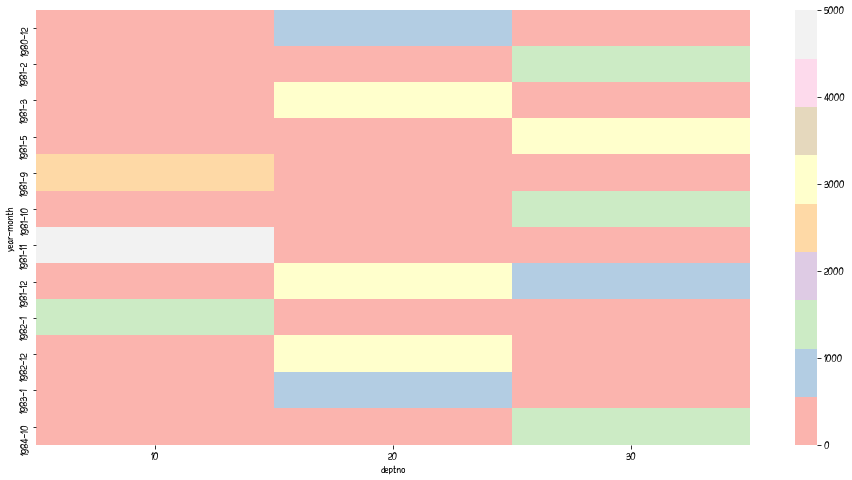

In [35]:
# 3-(11)
plt.figure(figsize=(16,8))
sns.heatmap(pv2, cmap="Pastel1")